In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd
import scipy.stats as stats

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# About dataset

In [ ]:
# Load and read dataset
df = pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Checking number of rows and columns of the dataset
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  150
Number of columns:  5


In [ ]:
# Checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Checking for duplicate values
dup = df.duplicated().sum()
print(f'Number of duplicated rows: {dup}')

Number of duplicated rows: 3


In [ ]:
#Removing the duplicate rows from the dataset
df=df.drop_duplicates()

In [ ]:
# Checking for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**📊INSIGHTS:**

The dataset consists of lenght and width of both sepal and petal and the correponding calssification for the same. It consists of 150 rows with no missing values and 3 duplicate values. The duplicate rows has been dropped from the dataset.

#Univariate analysis

In [ ]:
# Dataset description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


In [ ]:
#Calculating skewness and kurtosis of columns
num_col_list=['sepal_length','sepal_width','petal_length','petal_width']
for i in num_col_list:
  print("Skewness of ",i,"is",stats.skew(df[i]))
  print("Kurtosis of ",i,"is",stats.kurtosis(df[i]))
  print("\n")

Skewness of  sepal_length is 0.28956576122270994
Kurtosis of  sepal_length is -0.5787324753546912


Skewness of  sepal_width is 0.3210314932078384
Kurtosis of  sepal_width is 0.19798157846241082


Skewness of  petal_length is -0.29075733391387637
Kurtosis of  petal_length is -1.368695341078521


Skewness of  petal_width is -0.1123173708355768
Kurtosis of  petal_width is -1.313903602023749




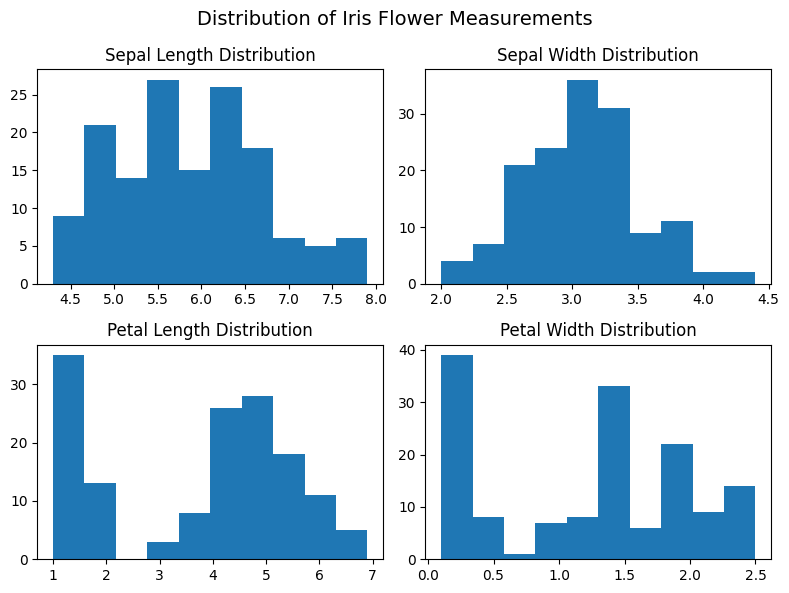

In [ ]:
# Chart - 1 Histogram
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(df['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(df['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()
plt.show()

**📊INSIGHTS:**

1. **Sepal Length Distribution**:
   - The sepal length shows a bimodal distribution with peaks around 5.0-5.5 cm and 6.0-6.5 cm.
   - This suggests that there might be two groups of Iris species with distinct sepal lengths.
   - The spread of the data indicates variability, suggesting that sepal length is a distinguishing feature among the species.

2. **Sepal Width Distribution**:
   - The sepal width has a peak around 3.0 cm and shows a right-skewed distribution.
   - Most sepal widths are concentrated between 2.5 cm and 3.5 cm.
   - The skewness indicates that while most Iris flowers have a sepal width around the peak, there are some with larger widths.

3. **Petal Length Distribution**:
   - The petal length is heavily skewed to the right with a large peak around 1.0-1.5 cm.
   - This indicates a clear separation where a majority of the flowers have smaller petal lengths, likely representing one or more species with small petals.
   - The presence of a few flowers with significantly larger petal lengths suggests distinct groups within the dataset.

4. **Petal Width Distribution**:
   - The petal width also shows a right-skewed distribution with a peak at the lower end (around 0.2-0.5 cm).
   - Similar to petal length, this suggests that a large number of flowers have small petal widths.
   - The skewness and the presence of flowers with larger petal widths again indicate distinct species groups.

**General Insights:**

1. **Species Differentiation**:
   - The bimodal and skewed distributions suggest that the measurements can be useful in distinguishing between different species of Iris flowers.
   - Particularly, petal length and petal width show clear separations that may correspond to different species.

2. **Feature Importance**:
   - Petal dimensions (length and width) appear to have more distinct separations compared to sepal dimensions, suggesting that petal measurements might be more informative for classification tasks.

#Bivariate analysis

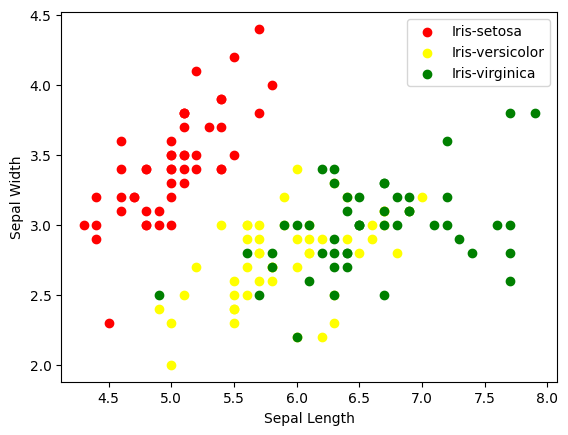

In [ ]:
# Chart - 2 Scatter plot for Sepal Length vs Sepal Width.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Creating a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

plt.show()

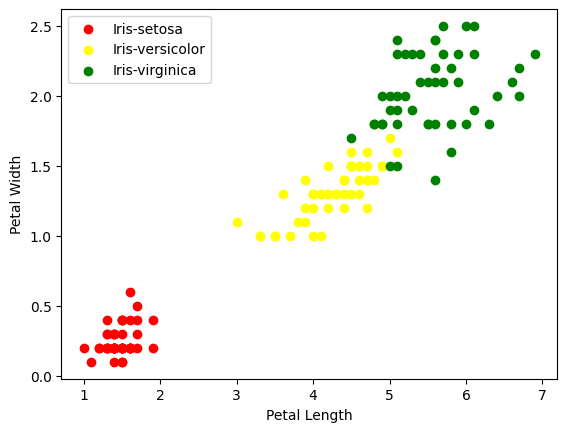

In [ ]:
# Chart - 3 Scatter plot for Petal Length vs Petal Width.
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

plt.show()

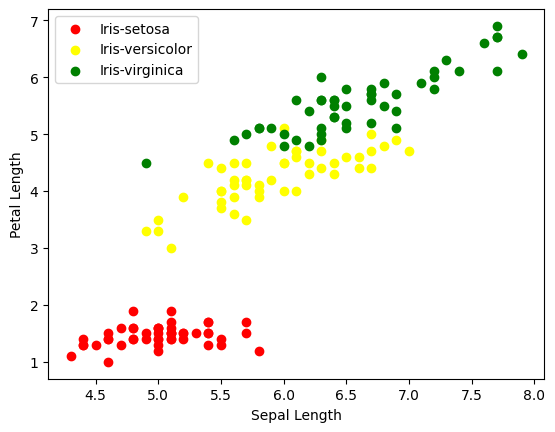

In [ ]:
# Chart - 4 Scatter plot for Sepal Length vs Petal Length.
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

plt.show()

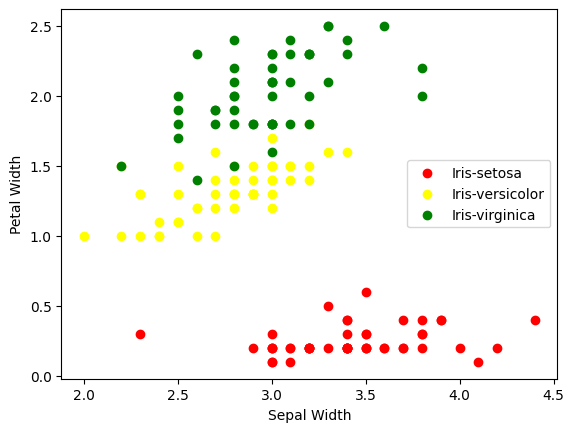

In [ ]:
# Chart - 5 Scatter plot for Sepal Width vs Petal Width.
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

plt.show()

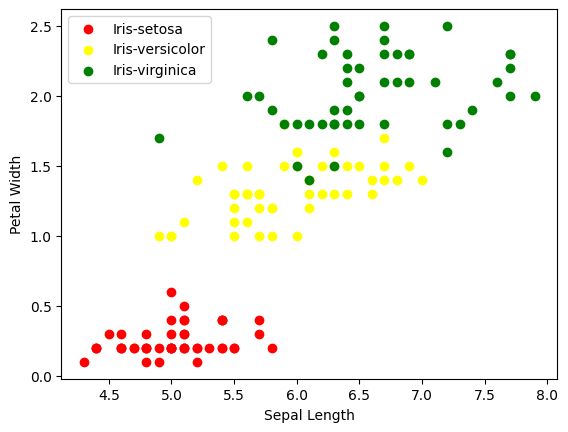

In [ ]:
# Chart - 6 Scatter plot for Sepal Lenght vs Petal Width.
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

plt.show()

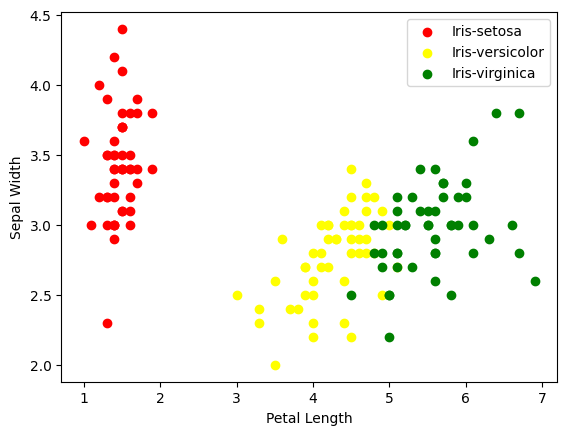

In [ ]:
# Chart - 7 Scatter plot for Petal Lenght vs Sepal Width.
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['sepal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

plt.show()

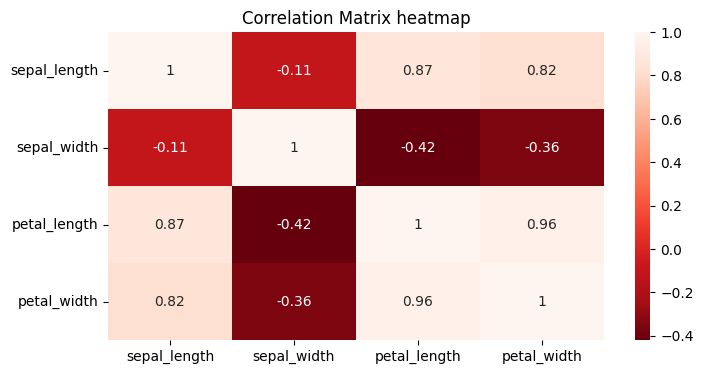

In [ ]:
# Correlation Heatmap
data=df.iloc[:,:-1]
corr_matrix = data.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

📊INSIGHTS:

It can be infered that petal lenght and width plays a more distinctive role in classsifying the species.

# Feature engineering and data pre-processing

In [ ]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
df['species'] = le.fit_transform(df['species']) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

In [ ]:
# Defining the x and y
x=df.drop(columns=['species'], axis=1)
y=df['species']

In [ ]:
# Splitting the data to train and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)

#Model building

In [ ]:
# ML Model - 1 Logistic regression
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

In [ ]:
# Fit the model to the training data.
lr_model.fit(x_train, y_train)

# make predictions on the test data
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)


Confusion Matrix:


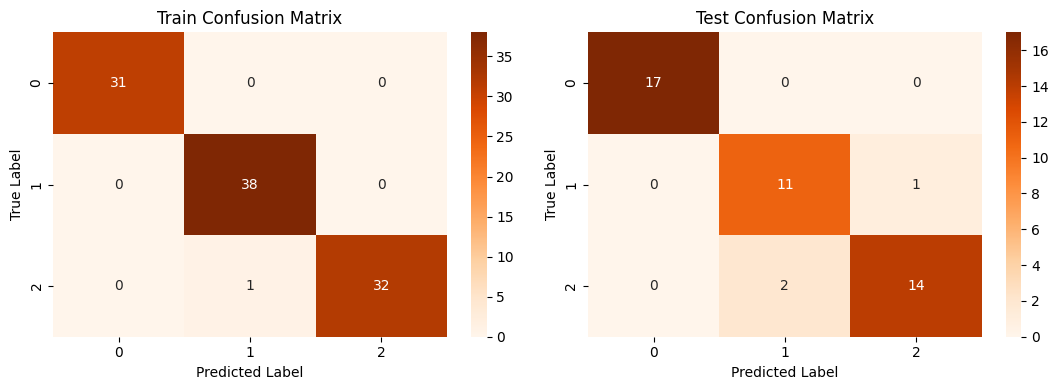



Accuracy score of model on training dataset: 0.99
Accuracy score of model on testing dataset: 0.933


In [ ]:
#Model evaluation
# calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(1, 2, figsize=(11,4))

#Displaying the confusion matrix as a heat map
print("\nConfusion Matrix:")
sns.heatmap(cm_train, annot=True, xticklabels=['0','1','2'], yticklabels=['0','1','2'], cmap="Oranges", fmt='.4g', ax=ax[0])
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[0].set_title("Train Confusion Matrix")

sns.heatmap(cm_test, annot=True, xticklabels=['0','1','2'], yticklabels=['0','1','2'], cmap="Oranges", fmt='.4g', ax=ax[1])
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

#Calculating the accuracy score of model on training and testing dataset
acc_train = round(accuracy_score(y_true = y_train, y_pred = y_pred_train),3)
acc_test = round(accuracy_score(y_true = y_test, y_pred = y_pred_test),3)
print("\n\nAccuracy score of model on training dataset:", acc_train)
print("Accuracy score of model on testing dataset:", acc_test)

**📊INSIGHTS:**

The first model we have choosen is Logistic regression.

  1. **Confusion matrix on training dataset:**

        - 31 instances of class 0 are correctly classified as 0
        - 0 instances of class 0 are misclassified as 1 and 2
        - 0 instances of class 1 is misclassified as 0 and 2
        - 38 instances of class 1 are correctly predicted as 1
        - 0 instances of class 2 are misclassified as 0
        - 1 instance of class 2 is misclassified as 1
        - 32 instances of class 2 are correctly classified as 2
      
  2.  **Confusion matrix on testing dataset:**

        - 17 instances of class 0 are correctly classified as 0
        - 0 instances of class 0 are misclassified as 1 and 2
        - 0 instances of class 1 is misclassified as 0
        - 11 instances of class 1 are correctly predicted as 1
        - 1 instance of class 1 is misclassified as 2
        - 0 instances of class 2 are misclassified as 0
        - 2 instance of class 2 is misclassified as 1
        - 14 instances of class 2 are correctly classified as 2

  3. **Accuracy score:**

  The accuracy score on both testing and training data indicates that the model is a good model. And since there is less difference between the testing and tarining accuracy score we can say that the model is not significantly overfitted.



In [ ]:
# ML Model - 2 Decision tree
dt_model = DecisionTreeClassifier(random_state=20)

In [ ]:
# Fit the model to the training data.
dt_model.fit(x_train, y_train)

# make predictions on the test data
y_pred_train = dt_model.predict(x_train)
y_pred_test = dt_model.predict(x_test)


Confusion Matrix:


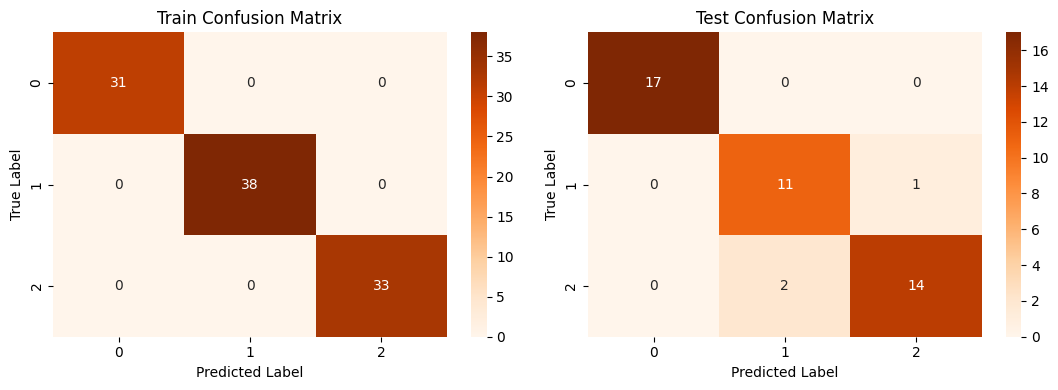



Accuracy score of model on training dataset: 1.0
Accuracy score of model on testing dataset: 0.933


In [ ]:
#Model evaluation
# calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(1, 2, figsize=(11,4))

#Displaying the confusion matrix as a heat map
print("\nConfusion Matrix:")
sns.heatmap(cm_train, annot=True, xticklabels=['0','1','2'], yticklabels=['0','1','2'], cmap="Oranges", fmt='.4g', ax=ax[0])
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[0].set_title("Train Confusion Matrix")

sns.heatmap(cm_test, annot=True, xticklabels=['0','1','2'], yticklabels=['0','1','2'], cmap="Oranges", fmt='.4g', ax=ax[1])
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

#Calculating the accuracy score of model on training and testing dataset
acc_train = round(accuracy_score(y_true = y_train, y_pred = y_pred_train),3)
acc_test = round(accuracy_score(y_true = y_test, y_pred = y_pred_test),3)
print("\n\nAccuracy score of model on training dataset:", acc_train)
print("Accuracy score of model on testing dataset:", acc_test)

**📊INSIGHTS:**

The second model we have choosen is Decision tree.

  1. **Confusion matrix on training dataset:**

        - 31 instances of class 0 are correctly classified as 0
        - 0 instances of class 0 are misclassified as 1 and 2
        - 0 instances of class 1 is misclassified as 0 and 2
        - 38 instances of class 1 are correctly predicted as 1
        - 0 instances of class 2 are misclassified as 0 and 1
        - 33 instances of class 2 are correctly classified as 2
      
  2.  **Confusion matrix on testing dataset:**

        - 17 instances of class 0 are correctly classified as 0
        - 0 instances of class 0 are misclassified as 1 and 2
        - 0 instances of class 1 is misclassified as 0
        - 11 instances of class 1 are correctly predicted as 1
        - 1 instance of class 1 is misclassified as 2
        - 0 instances of class 2 are misclassified as 0
        - 2 instance of class 2 is misclassified as 1
        - 14 instances of class 2 are correctly classified as 2

  3. **Accuracy score:**

  The accuracy score on both testing and training data indicates that the model is a good model. But however there may be a chance of overfitting of the model, since the difference between training and testing accuracy score is significant.



In [ ]:
# ML Model - 4 SVM
svm_model = SVC(kernel='linear', random_state=42, probability=True)

In [ ]:
# Fit the model to the training data.
svm_model.fit(x_train, y_train)

# make predictions on the test data
y_pred_train = svm_model.predict(x_train)
y_pred_test = svm_model.predict(x_test)


Confusion Matrix:


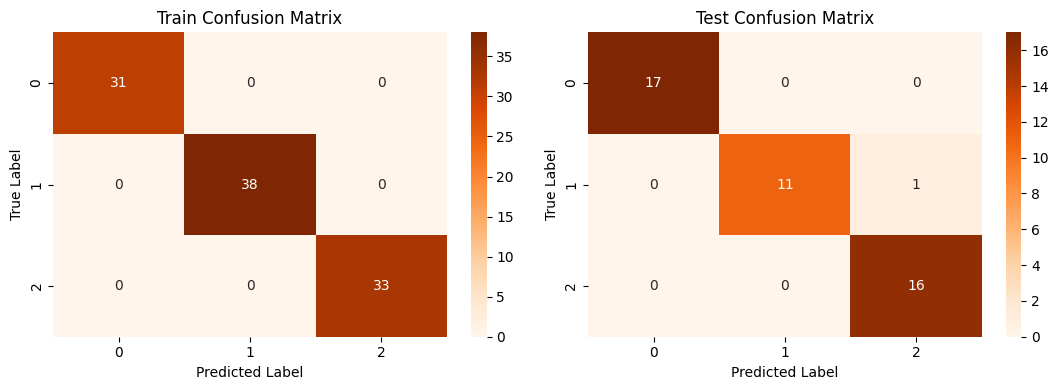



Accuracy score of model on training dataset: 1.0
Accuracy score of model on testing dataset: 0.978


In [ ]:
#Model evaluation
# calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(1, 2, figsize=(11,4))

#Displaying the confusion matrix as a heat map
print("\nConfusion Matrix:")
sns.heatmap(cm_train, annot=True, xticklabels=['0','1','2'], yticklabels=['0','1','2'], cmap="Oranges", fmt='.4g', ax=ax[0])
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[0].set_title("Train Confusion Matrix")

sns.heatmap(cm_test, annot=True, xticklabels=['0','1','2'], yticklabels=['0','1','2'], cmap="Oranges", fmt='.4g', ax=ax[1])
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

#Calculating the accuracy score of model on training and testing dataset
acc_train = round(accuracy_score(y_true = y_train, y_pred = y_pred_train),3)
acc_test = round(accuracy_score(y_true = y_test, y_pred = y_pred_test),3)
print("\n\nAccuracy score of model on training dataset:", acc_train)
print("Accuracy score of model on testing dataset:", acc_test)

**📊INSIGHTS:**

The first model we have choosen is SVM.

  1. **Confusion matrix on training dataset:**

        - 31 instances of class 0 are correctly classified as 0
        - 0 instances of class 0 are misclassified as 1 and 2
        - 0 instances of class 1 is misclassified as 0 and 2
        - 38 instances of class 1 are correctly predicted as 1
        - 0 instances of class 2 are misclassified as 0 and 1
        - 33 instances of class 2 are correctly classified as 2
      
  2.  **Confusion matrix on testing dataset:**

        - 17 instances of class 0 are correctly classified as 0
        - 0 instances of class 0 are misclassified as 1 and 2
        - 0 instances of class 1 is misclassified as 0
        - 11 instances of class 1 are correctly predicted as 1
        - 1 instance of class 1 is misclassified as 2
        - 0 instances of class 2 are misclassified as 0 and 1
        - 16 instances of class 2 are correctly classified as 2

  3. **Accuracy score:**

  The accuracy score on both testing and training data indicates that the model is a good model. Since there is little difference between the accuracy scores of training and testing dataset there is no significant overfitting for the model.



#Model selection and prediction

After carefull evaluation, we have selected the SVM model for our classification problem.

In [ ]:
#sample data for prediction
sample_x1 = np.array([[5.1, 3.5, 1.4, 0.2]])
sample_x2=np.array([[5.9,3.0,5.1,1.8]])

# Using SVM model to make a prediction.
x_rf_prediction1 = svm_model.predict(sample_x1)
x_rf_prediction1
x_rf_prediction2 = svm_model.predict(sample_x2)
x_rf_prediction2

# Display the predicted category label.
Category = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']
print(Category[int(x_rf_prediction1[0])])
print(Category[int(x_rf_prediction2[0])])

Iris-Setosa
Iris-Virginica
